In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings ('ignore')
import seaborn as sns

In [76]:
train =  pd.read_csv('C:/Users/DELL/Downloads/Bigmart/train_mart.csv')

In [77]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [78]:
train.shape

(8523, 12)

In [79]:
## missing values
train.isnull().sum()/len(train)

Item_Identifier              0.000000
Item_Weight                  0.171653
Item_Fat_Content             0.000000
Item_Visibility              0.000000
Item_Type                    0.000000
Item_MRP                     0.000000
Outlet_Identifier            0.000000
Outlet_Establishment_Year    0.000000
Outlet_Size                  0.282764
Outlet_Location_Type         0.000000
Outlet_Type                  0.000000
Item_Outlet_Sales            0.000000
dtype: float64

In [80]:
## test
test = pd.read_csv('C:/Users/DELL/Downloads/Bigmart/test_mart.csv')

In [81]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [82]:
test.shape

(5681, 11)

In [83]:
## missing values of test
test.isnull().sum()/len(test)

Item_Identifier              0.000000
Item_Weight                  0.171801
Item_Fat_Content             0.000000
Item_Visibility              0.000000
Item_Type                    0.000000
Item_MRP                     0.000000
Outlet_Identifier            0.000000
Outlet_Establishment_Year    0.000000
Outlet_Size                  0.282697
Outlet_Location_Type         0.000000
Outlet_Type                  0.000000
dtype: float64

In [84]:
train.replace(['low fat','LF'],'Low Fat' ,inplace = True)
test.replace(['low fat','LF'],'Low Fat' ,inplace = True)

In [85]:
train.replace(['reg'],'Regular' ,inplace = True)
test.replace(['reg'],'Regular' ,inplace = True)

In [86]:
## fill the missing value of oulet size
train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0],inplace = True)
test['Outlet_Size'].fillna(test['Outlet_Size'].mode()[0],inplace = True)

In [87]:
## fill the missing value of item weight 
train['Item_Weight'].fillna(train['Item_Weight'].median(),inplace = True)
test['Item_Weight'].fillna(test['Item_Weight'].median(),inplace = True)

In [88]:
test.isnull().sum()/len(test)

Item_Identifier              0.0
Item_Weight                  0.0
Item_Fat_Content             0.0
Item_Visibility              0.0
Item_Type                    0.0
Item_MRP                     0.0
Outlet_Identifier            0.0
Outlet_Establishment_Year    0.0
Outlet_Size                  0.0
Outlet_Location_Type         0.0
Outlet_Type                  0.0
dtype: float64

In [89]:
train.isnull().sum()/len(train)

Item_Identifier              0.0
Item_Weight                  0.0
Item_Fat_Content             0.0
Item_Visibility              0.0
Item_Type                    0.0
Item_MRP                     0.0
Outlet_Identifier            0.0
Outlet_Establishment_Year    0.0
Outlet_Size                  0.0
Outlet_Location_Type         0.0
Outlet_Type                  0.0
Item_Outlet_Sales            0.0
dtype: float64

In [90]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [91]:
num_col = train.select_dtypes(include = 'number').columns.to_list()
num_col

['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Item_Outlet_Sales']

In [92]:
train[num_col].skew()

Item_Weight                  0.121845
Item_Visibility              1.167091
Item_MRP                     0.127202
Outlet_Establishment_Year   -0.396641
Item_Outlet_Sales            1.177531
dtype: float64

In [93]:
cat_col = train.select_dtypes(exclude = 'number').columns.to_list()

In [94]:
cat_col

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [95]:
train[cat_col].value_counts(normalize=True)

Item_Identifier  Item_Fat_Content  Item_Type              Outlet_Identifier  Outlet_Size  Outlet_Location_Type  Outlet_Type      
DRA12            Low Fat           Soft Drinks            OUT010             Medium       Tier 3                Grocery Store        0.000117
FDV28            Regular           Frozen Foods           OUT010             Medium       Tier 3                Grocery Store        0.000117
FDV32            Low Fat           Fruits and Vegetables  OUT045             Medium       Tier 2                Supermarket Type1    0.000117
                                                          OUT035             Small        Tier 2                Supermarket Type1    0.000117
                                                          OUT019             Small        Tier 1                Grocery Store        0.000117
                                                                                                                                       ...   
FDJ22            L

In [96]:
num_col1 = test.select_dtypes(include = 'number').columns.to_list()
num_col1

['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']

In [97]:
cat_col1 = test.select_dtypes(exclude ='number').columns.to_list()
cat_col1

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [98]:
test[num_col1].skew()

Item_Weight                  0.166489
Item_Visibility              1.238312
Item_MRP                     0.136182
Outlet_Establishment_Year   -0.396306
dtype: float64

In [99]:
test[cat_col1].value_counts(normalize=True)

Item_Identifier  Item_Fat_Content  Item_Type              Outlet_Identifier  Outlet_Size  Outlet_Location_Type  Outlet_Type      
DRA12            Low Fat           Soft Drinks            OUT027             Medium       Tier 3                Supermarket Type3    0.000176
FDV37            Regular           Canned                 OUT017             Medium       Tier 2                Supermarket Type1    0.000176
FDV31            Low Fat           Fruits and Vegetables  OUT035             Small        Tier 2                Supermarket Type1    0.000176
                                                          OUT027             Medium       Tier 3                Supermarket Type3    0.000176
                                                          OUT018             Medium       Tier 3                Supermarket Type2    0.000176
                                                                                                                                       ...   
FDJ27            R

## Checking the outliers in Train and Test 

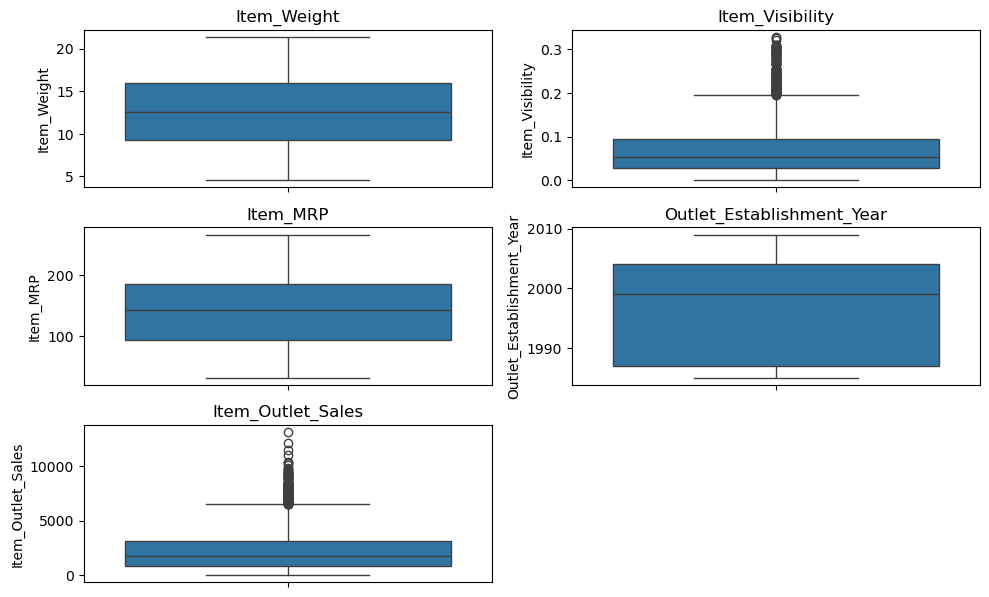

In [101]:
## checking the outliers in train 
plt.figure(figsize=(10,8))
t=1
for i in num_col:
    plt.subplot(4,2,t)
    sns.boxplot(train[i])
    plt.title(i)
    t+=1
plt.tight_layout()
plt.show()

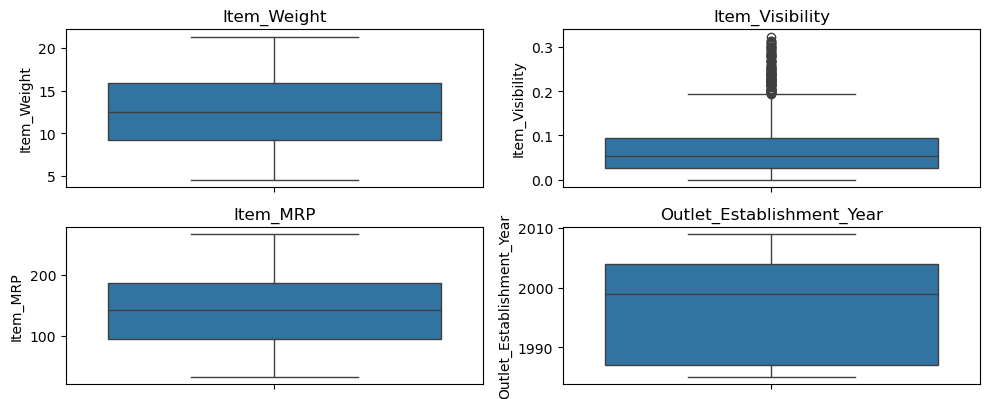

In [102]:
## checking the outliers in test
plt.figure(figsize=(10,8))
t=1
for i in num_col1:
    plt.subplot(4,2,t)
    sns.boxplot(test[i])
    plt.title(i)
    t+=1
plt.tight_layout()
plt.show()

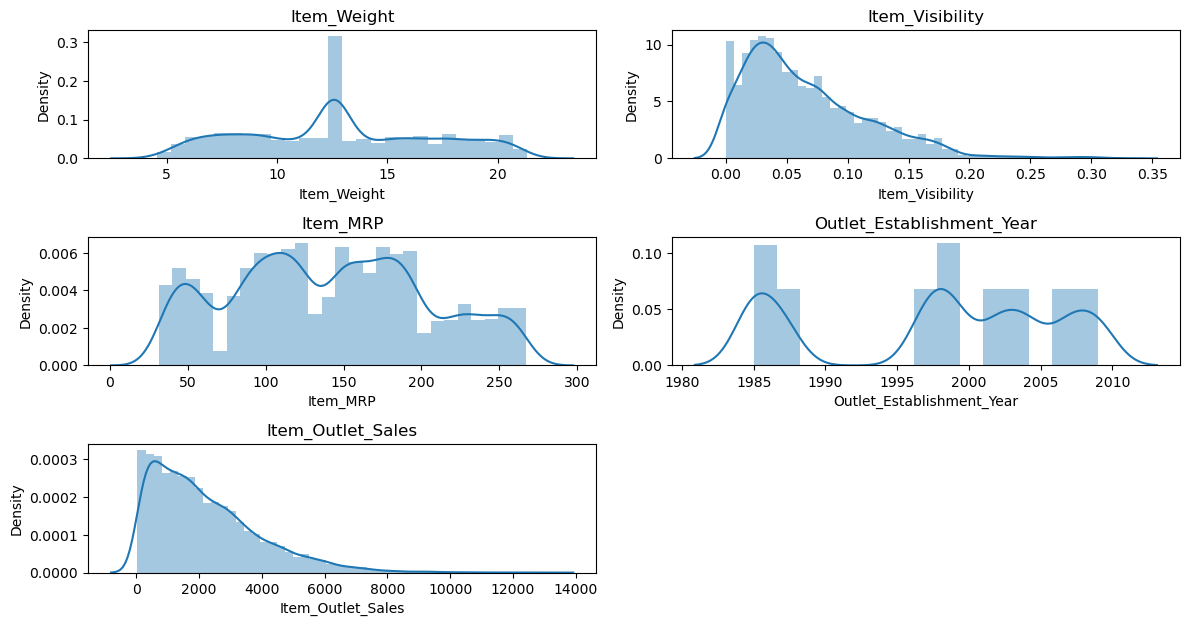

In [103]:
## Checking the distribution of data in train and test
plt.figure(figsize=(12,8))
t=1
for i in num_col:
    plt.subplot(4,2,t)
    sns.distplot(train[i])
    plt.title(i)
    t+=1
plt.tight_layout()
plt.show()

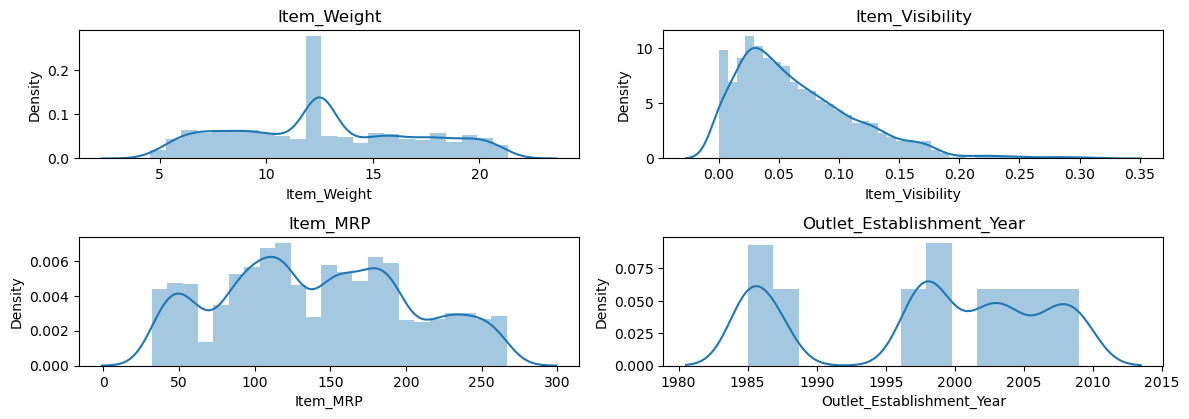

In [104]:
## Checking the distribution of data in  test
plt.figure(figsize=(12,8))
t=1
for i in num_col1:
    plt.subplot(4,2,t)
    sns.distplot(test[i])
    plt.title(i)
    t+=1
plt.tight_layout()
plt.show()

In [105]:
## encoding
from sklearn.preprocessing import LabelEncoder

In [106]:
L= LabelEncoder()

In [107]:
for col in cat_col:
    train[col] = L.fit_transform(train[col])


In [108]:
for col in cat_col1:
    test[col] = L.fit_transform(test[col])

In [109]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In [110]:
train['Outlet_Establishment_Year'].unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004], dtype=int64)

In [111]:
train['Outlet_Establishment_Year'] = pd.to_datetime(train['Outlet_Establishment_Year'], format='%Y')

In [112]:
test['Outlet_Establishment_Year'] = pd.to_datetime(test['Outlet_Establishment_Year'],format = '%Y')

In [113]:
import datetime

# Get the current year
current_year = datetime.datetime.now().year

# Calculate the age of the outlet
train['Age_of_Outlet'] = current_year - train['Outlet_Establishment_Year'].dt.year


In [114]:
import datetime

current_year = datetime.datetime.now().year

test['Age_of_Outlet'] = current_year - test['Outlet_Establishment_Year'].dt.year

In [115]:
train.drop('Outlet_Establishment_Year', inplace=True,axis = 1)

In [116]:
test.drop('Outlet_Establishment_Year', inplace=True,axis = 1)

In [117]:
# Drop the target column from test data since we don't want to use it in the training
#test_data = test_data.drop('Item_Outlet_Sales', axis=1)

# Split features and target in the train dataset
X_train = train.drop('Item_Outlet_Sales', axis=1)
y_train = train['Item_Outlet_Sales']


In [118]:
# Drop the target column from test data since we don't want to use it in the training
#test = test.drop('Item_Outlet_Sales', axis=1)

# Split features and target in the train dataset
X_train = train.drop('Item_Outlet_Sales', axis=1)
y_train = train['Item_Outlet_Sales']

# Now, train your regression model (for example, using a RandomForestRegressor)
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)

# Use the model to predict on the test data (which doesn't have the target)
predictions = model.predict(test)


In [119]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Make predictions on the training data
train_predictions = model.predict(X_train)

# Calculate RMSE on the training data
rmse_train = np.sqrt(mean_squared_error(y_train, train_predictions))

print(f'RMSE on Training Data: {rmse_train}')


RMSE on Training Data: 424.00157725985076


## After Scaling 

In [121]:
from sklearn.preprocessing import RobustScaler

r = RobustScaler()
xtrain_sc = r.fit_transform(X_train)
xtrain_sc = pd.DataFrame(xtrain_sc, columns=X_train.columns)

In [122]:
# Split features and target in the train dataset
xtest_sc = r.transform(test)
xtest_sc = pd.DataFrame(xtest_sc, columns=test.columns)

In [123]:
X_train = train.drop('Item_Outlet_Sales', axis=1)
y_train = train['Item_Outlet_Sales']

# Now, train your regression model (for example, using a RandomForestRegressor)
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(xtrain_sc, y_train)

# Use the model to predict on the test data (which doesn't have the target)
predictions = model.predict(xtest_sc)

In [124]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Make predictions on the training data
train_predictions = model.predict(xtrain_sc)

# Calculate RMSE on the training data
rmse_train = np.sqrt(mean_squared_error(y_train, train_predictions))

print(f'RMSE on Training Data: {rmse_train}')


RMSE on Training Data: 421.68482529982714


In [125]:

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor,StackingRegressor,VotingRegressor,RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

In [126]:
X_train = train.drop('Item_Outlet_Sales', axis=1)
y_train = train['Item_Outlet_Sales']

model2 = DecisionTreeRegressor()
model2.fit(xtrain_sc, y_train)

# Use the model to predict on the test data (which doesn't have the target)
predictions = model2.predict(xtest_sc)

In [127]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Make predictions on the training data
train_predictions = model2.predict(xtrain_sc)

# Calculate RMSE on the training data
rmse_train = np.sqrt(mean_squared_error(y_train, train_predictions))

print(f'RMSE on Training Data: {rmse_train}')


RMSE on Training Data: 0.0


In [128]:
X_train = train.drop('Item_Outlet_Sales', axis=1)
y_train = train['Item_Outlet_Sales']

model3 = XGBRegressor()
model3.fit(xtrain_sc, y_train)

# Use the model to predict on the test data (which doesn't have the target)
predictions = model3.predict(xtest_sc)

In [129]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Make predictions on the training data
train_predictions = model3.predict(xtrain_sc)

# Calculate RMSE on the training data
rmse_train = np.sqrt(mean_squared_error(y_train, train_predictions))

print(f'RMSE on Training Data: {rmse_train}')


RMSE on Training Data: 660.3193774006854


In [130]:
X_train = train.drop('Item_Outlet_Sales', axis=1)
y_train = train['Item_Outlet_Sales']

model4 = AdaBoostRegressor()
model4.fit(xtrain_sc, y_train)

# Use the model to predict on the test data (which doesn't have the target)
predictions = model4.predict(xtest_sc)

In [186]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Make predictions on the training data
train_predictions = model4.predict(xtrain_sc)

# Calculate RMSE on the training data
rmse_train = np.sqrt(mean_squared_error(y_train, train_predictions))

print(f'RMSE on Training Data: {rmse_train}')


RMSE on Training Data: 1178.5156173024177


In [190]:
sc  = pd.DataFrame({"RMSE" : [421,0,660,1178],
                    'Model':['Random Forest Regressor ','Decision Tree','XGB Regressor','Adaboost Regressor']})
sc
        

,RMSE,Model
0,421,Random Forest Regressor
1,0,Decision Tree
2,660,XGB Regressor
3,1178,Adaboost Regressor
